<a href="https://colab.research.google.com/github/jarinari/Algorithmic-Trading-Plugins/blob/master/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENTORNO

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#DATOS

In [ ]:
df = yf.download(['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-A', 'JPM', 'V',
                  'SEDG', 'ALK', 'SEE', 'ZION', 'MHK', 'WHR', 'CMA', 'CTLT', 'XRAY', 'XOM',
                  'UNH', 'LLY', 'JNJ', 'AVGO', 'PG', 'MA', 'HD', 'CVX', 'MRK', 'ABBV'], progress=False)['Adj Close']
df = df.dropna()
df

,AAPL,ABBV,ALK,AMZN,AVGO,BRK-A,CMA,CTLT,CVX,GOOG,...,PG,SEDG,SEE,TSLA,UNH,V,WHR,XOM,XRAY,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-26,27.912819,39.542847,59.260471,18.367500,97.060349,216240.0,33.555454,30.100000,72.343712,27.682499,...,64.013428,20.700001,39.462547,12.694000,101.750877,61.736073,147.309982,56.823147,46.990139,21.629522
2015-03-27,27.690390,39.805210,60.159340,18.528000,99.784370,217000.0,33.317097,30.100000,71.677010,27.341932,...,64.138100,21.070000,39.655251,12.333333,103.291367,61.689026,149.150909,56.324448,47.241268,21.378677
2015-03-30,28.391359,40.212601,60.718834,18.729500,101.605576,219700.0,33.823605,31.170000,73.477852,27.525928,...,64.457581,22.070000,40.224632,12.704667,105.908432,61.801987,151.059418,57.705952,47.697037,21.848005
2015-03-31,27.955505,40.419735,60.700481,18.605000,98.827080,217500.0,33.615040,31.150000,72.158150,27.324980,...,63.849792,21.930000,39.909298,12.584667,103.536469,61.566658,151.825867,57.281391,47.334282,21.848005
2015-04-01,27.915060,39.425472,58.700985,18.513000,97.776382,216300.0,33.600151,30.860001,72.027542,27.053724,...,64.145889,22.240000,39.672783,12.506000,102.801239,61.350174,151.322449,56.917500,46.748306,21.791361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,189.429993,144.149994,34.080002,144.839996,923.969971,542395.0,49.450001,39.970001,144.869995,130.630005,...,152.059998,83.599998,33.500000,235.580002,548.280029,254.440002,111.930000,102.430000,32.730000,38.680000
2023-12-05,193.419998,144.570007,35.570000,146.880005,913.119995,539250.0,47.830002,38.910000,142.860001,132.389999,...,146.759995,81.900002,31.700001,238.720001,550.260010,254.610001,108.089996,100.440002,32.180000,37.389999
2023-12-06,192.320007,146.380005,35.669998,144.520004,903.640015,535220.0,47.619999,37.950001,142.529999,131.429993,...,146.649994,80.669998,32.759998,239.369995,549.530029,254.289993,109.220001,99.110001,32.209999,37.150002


#PARTICIÓN

In [ ]:
train = df[df.index<'2023-01-01']
test = df[df.index>'2022-12-31']

#RANKING

In [ ]:
sharpes = []
for darwin in train.columns:
  sharpe = train[darwin].pct_change().mean()/train[darwin].pct_change().std()
  sharpes.append(sharpe)

df_sharpe = pd.DataFrame({'Sharpe': sharpes})
df_sharpe.index = train.columns
df_sharpe = df_sharpe.sort_values('Sharpe', ascending=False)
df_sharpe

,Sharpe
NVDA,0.071516
MSFT,0.063439
LLY,0.060700
UNH,0.058306
SEDG,0.052947
AVGO,0.051103
AAPL,0.050908
TSLA,0.050233
MA,0.049093
ABBV,0.049062


#DESCORRELACIÓN DE PRECIOS

In [ ]:
df_corr_price = train.corr().unstack().reset_index()
df_corr_price.columns = ['Variable 1', 'Variable 2', 'Correlación']
df_corr_price = df_corr_price[df_corr_price['Variable 1'] != df_corr_price['Variable 2']]
df_corr_price[['Variable 1', 'Variable 2']] = np.sort(df_corr_price[['Variable 1', 'Variable 2']].values, axis=1)
df_corr_price = df_corr_price.drop_duplicates()
df_corr_price = df_corr_price.sort_values('Correlación', ascending=False)
df_corr_price.head(5)

,Variable 1,Variable 2,Correlación
445,MA,V,0.996542
318,HD,MSFT,0.984652
18,AAPL,MSFT,0.979845
288,GOOG,MSFT,0.975234
289,GOOG,NVDA,0.972232


In [ ]:
correlateds_price = []
for index, row in df_corr_price.iterrows():
  var1 = row['Variable 1']
  var2 = row['Variable 2']
  ratio_var1 = df_sharpe.loc[df_sharpe.index == var1, 'Sharpe'].values[0]
  ratio_var2 = df_sharpe.loc[df_sharpe.index == var2, 'Sharpe'].values[0]
  if ratio_var1 < ratio_var2:
    if var1 not in correlateds_price:
      correlateds_price.append(var1)
  else:
    if var2 not in correlateds_price:
      correlateds_price.append(var2)
  if len(correlateds_price)==20:
    break
print('Elementos a eliminar: ', correlateds_price)

Elementos a eliminar:  ['V', 'HD', 'AAPL', 'GOOG', 'ABBV', 'AVGO', 'PG', 'BRK-A', 'JNJ', 'UNH', 'TSLA', 'MSFT', 'SEDG', 'MA', 'AMZN', 'CTLT', 'CMA', 'JPM', 'LLY', 'MRK']


In [ ]:
sel_price = [elemento for elemento in list(train.columns) if elemento not in correlateds_price]
print('Elemento a seleccionar: ', sel_price)

Elemento a seleccionar:  ['ALK', 'CVX', 'META', 'MHK', 'NVDA', 'SEE', 'WHR', 'XOM', 'XRAY', 'ZION']


#DESCORRELACIÓN DE RETORNOS

In [ ]:
df_corr_return = train.pct_change().corr().unstack().reset_index()
df_corr_return.columns = ['Variable 1', 'Variable 2', 'Correlación']
df_corr_return = df_corr_return[df_corr_return['Variable 1'] != df_corr_return['Variable 2']]
df_corr_return[['Variable 1', 'Variable 2']] = np.sort(df_corr_return[['Variable 1', 'Variable 2']].values, axis=1)
df_corr_return = df_corr_return.drop_duplicates()
df_corr_return = df_corr_return.sort_values('Correlación', ascending=False)
df_corr_return.head(5)

,Variable 1,Variable 2,Correlación
445,MA,V,0.905096
209,CMA,ZION,0.878792
267,CVX,XOM,0.838439
192,CMA,JPM,0.828694
389,JPM,ZION,0.793065


In [ ]:
correlateds_return = []
for index, row in df_corr_return.iterrows():
  var1 = row['Variable 1']
  var2 = row['Variable 2']
  ratio_var1 = df_sharpe.loc[df_sharpe.index == var1, 'Sharpe'].values[0]
  ratio_var2 = df_sharpe.loc[df_sharpe.index == var2, 'Sharpe'].values[0]
  if ratio_var1 < ratio_var2:
    if var1 not in correlateds_return:
      correlateds_return.append(var1)
  else:
    if var2 not in correlateds_return:
      correlateds_return.append(var2)
  if len(correlateds_return)==20:
    break
print('Elementos a eliminar: ', correlateds_return)

Elementos a eliminar:  ['V', 'CMA', 'XOM', 'ZION', 'GOOG', 'BRK-A', 'AAPL', 'AMZN', 'MA', 'META', 'MSFT', 'CVX', 'AVGO', 'JPM', 'HD', 'ALK', 'WHR', 'JNJ', 'MHK', 'MRK']


In [ ]:
sel_return = [elemento for elemento in list(train.columns) if elemento not in correlateds_return]
print('Elemento a seleccionar: ', sel_return)

Elemento a seleccionar:  ['ABBV', 'CTLT', 'LLY', 'NVDA', 'PG', 'SEDG', 'SEE', 'TSLA', 'UNH', 'XRAY']


#DESCORRELACIÓN DE DRAWDOWNS

In [ ]:
drawdowns = {}
for column in train.columns:
  series = train[column].pct_change().dropna()
  running_max = np.maximum.accumulate(series)
  drawdown = 1 - series / running_max
  drawdown_by_month = drawdown.groupby(drawdown.index.to_period('W')).min()
  drawdowns[column] = drawdown_by_month
train_dd = pd.DataFrame(drawdowns)
train_dd.tail(5)

,AAPL,ABBV,ALK,AMZN,AVGO,BRK-A,CMA,CTLT,CVX,GOOG,...,PG,SEDG,SEE,TSLA,UNH,V,WHR,XOM,XRAY,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-28/2022-12-04,0.594404,0.863177,0.908572,0.684532,0.640968,0.917391,0.937902,0.037811,0.934172,0.607714,...,0.789364,0.843662,0.909041,0.614464,0.707598,0.725633,0.942533,0.942955,0.779044,0.933308
2022-12-05/2022-12-11,0.898733,0.925465,0.944120,0.848805,0.837793,0.977218,0.941635,1.135999,0.974002,1.058350,...,0.940141,0.859498,1.016215,0.837418,0.927901,0.955156,0.938409,0.941445,0.900994,0.970630
2022-12-12/2022-12-18,0.863198,0.899327,0.868497,0.848387,0.836502,0.845392,0.886893,0.797405,0.902078,0.847523,...,0.914477,0.856213,0.885056,0.972111,0.903495,0.796121,0.914403,0.805876,0.788353,0.919761
2022-12-19/2022-12-25,0.801270,0.926269,0.909679,0.868753,0.800205,0.802437,0.886649,0.921222,0.864051,0.890598,...,0.923626,0.847806,0.960937,1.008389,0.889909,0.948992,0.897095,0.791555,0.917429,0.869285
2022-12-26/2023-01-01,0.763586,0.985224,0.819963,0.795885,0.850249,0.828034,0.921443,0.610904,0.944722,0.820591,...,0.927434,0.937846,0.910643,0.593730,0.978857,0.891810,0.883893,0.890484,0.738313,0.903106


In [ ]:
df_corr_dd = train_dd.corr().unstack().reset_index()
df_corr_dd.columns = ['Variable 1', 'Variable 2', 'Correlación']
df_corr_dd = df_corr_dd[df_corr_dd['Variable 1'] != df_corr_dd['Variable 2']]
df_corr_dd[['Variable 1', 'Variable 2']] = np.sort(df_corr_dd[['Variable 1', 'Variable 2']].values, axis=1)
df_corr_dd = df_corr_dd.drop_duplicates()
df_corr_dd = df_corr_dd.sort_values('Correlación', ascending=False)
df_corr_dd.head(5)

,Variable 1,Variable 2,Correlación
445,MA,V,0.848868
209,CMA,ZION,0.813747
192,CMA,JPM,0.789498
267,CVX,XOM,0.713080
162,BRK-A,JPM,0.706852


In [ ]:
correlateds_dd = []
for index, row in df_corr_dd.iterrows():
  var1 = row['Variable 1']
  var2 = row['Variable 2']
  ratio_var1 = df_sharpe.loc[df_sharpe.index == var1, 'Sharpe'].values[0]
  ratio_var2 = df_sharpe.loc[df_sharpe.index == var2, 'Sharpe'].values[0]
  if ratio_var1 < ratio_var2:
    if var1 not in correlateds_dd:
      correlateds_dd.append(var1)
  else:
    if var2 not in correlateds_dd:
      correlateds_dd.append(var2)
  if len(correlateds_dd)==20:
    break
print('Elementos a eliminar: ', correlateds_dd)

Elementos a eliminar:  ['V', 'CMA', 'XOM', 'BRK-A', 'ZION', 'GOOG', 'JPM', 'CVX', 'JNJ', 'HD', 'MA', 'WHR', 'META', 'ALK', 'MHK', 'PG', 'SEE', 'XRAY', 'MRK', 'AAPL']


In [ ]:
sel_dd = [elemento for elemento in list(train_dd.columns) if elemento not in correlateds_dd]
print('Elemento a seleccionar: ', sel_dd)

Elemento a seleccionar:  ['ABBV', 'AMZN', 'AVGO', 'CTLT', 'LLY', 'MSFT', 'NVDA', 'SEDG', 'TSLA', 'UNH']


#COMPARACIÓN

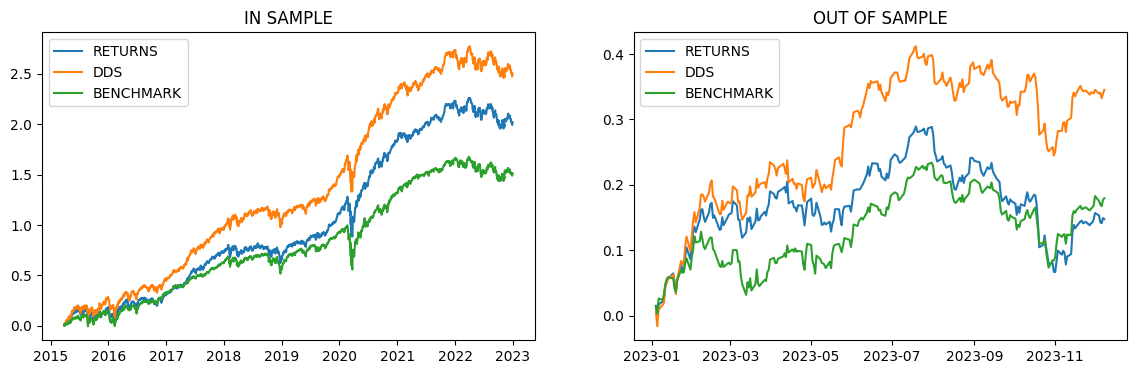

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(train.pct_change()[sel_return].mean(axis=1).cumsum(), label='RETURNS')
plt.plot(train.pct_change()[sel_dd].mean(axis=1).cumsum(), label='DDS')
plt.plot(train.pct_change().mean(axis=1).cumsum(), label='BENCHMARK')
plt.title('IN SAMPLE')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(test.pct_change()[sel_return].mean(axis=1).cumsum(), label='RETURNS')
plt.plot(test.pct_change()[sel_dd].mean(axis=1).cumsum(), label='DDS')
plt.plot(test.pct_change().mean(axis=1).cumsum(), label='BENCHMARK')
plt.title('OUT OF SAMPLE')
plt.legend()
plt.show()